# Sentinel2A

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from radtran import get_gamma, radtran
from radtran.filter_functions import generate_global_filter
from radtran.lib import retrieve_methane

In [2]:
aux_data_path = "../data/aux_data"
hapi_data_path = "../data/hapi_data"
solarangle = 0
obsangle = 0
instrument = "Sentinel2A"
temperature = 300
pressure = 1.013

In [3]:
gamma = get_gamma(solarangle, obsangle)

b11_global_filter = generate_global_filter(
    temperature, pressure, instrument, hapi_data_path, aux_data_path, "B11", gamma
)
b12_global_filter = generate_global_filter(
    temperature, pressure, instrument, hapi_data_path, aux_data_path, "B12", gamma
)

In [4]:
ch4s, nB11 = radtran(
    pressure, temperature, solarangle, obsangle, b11_global_filter, instrument, "B11", hapi_data_path, 0, 50
)
ch4s, nB12 = radtran(
    pressure, temperature, solarangle, obsangle, b12_global_filter, instrument, "B12", hapi_data_path, 0, 50
)

# The new strategy is to define the frac, as a table of values that are constructed from nB components
# Then such table can be parsed to retrieve_methane function

frac_table = nB12 / nB11 - 1
ch4_table = ch4s

array_500x500 = np.random.uniform(low=-0.15, high=0.01, size=(500, 500))
methane_500x500 = retrieve_methane(array_500x500, frac_table, ch4_table)

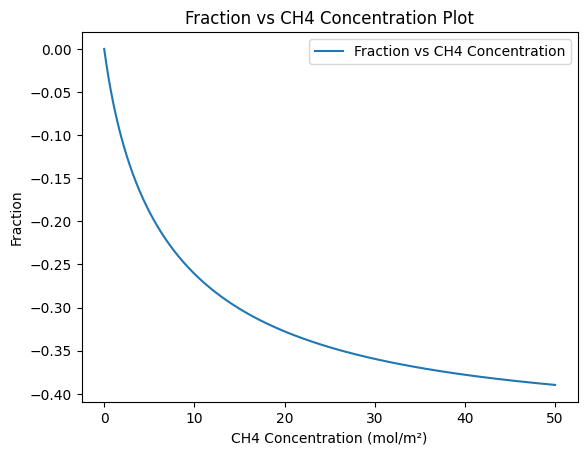

In [5]:
plt.plot(ch4_table, frac_table, label="Fraction vs CH4 Concentration")
plt.xlabel("CH4 Concentration (mol/m²)")
plt.ylabel("Fraction")
plt.title("Fraction vs CH4 Concentration Plot")
plt.legend()
plt.show()

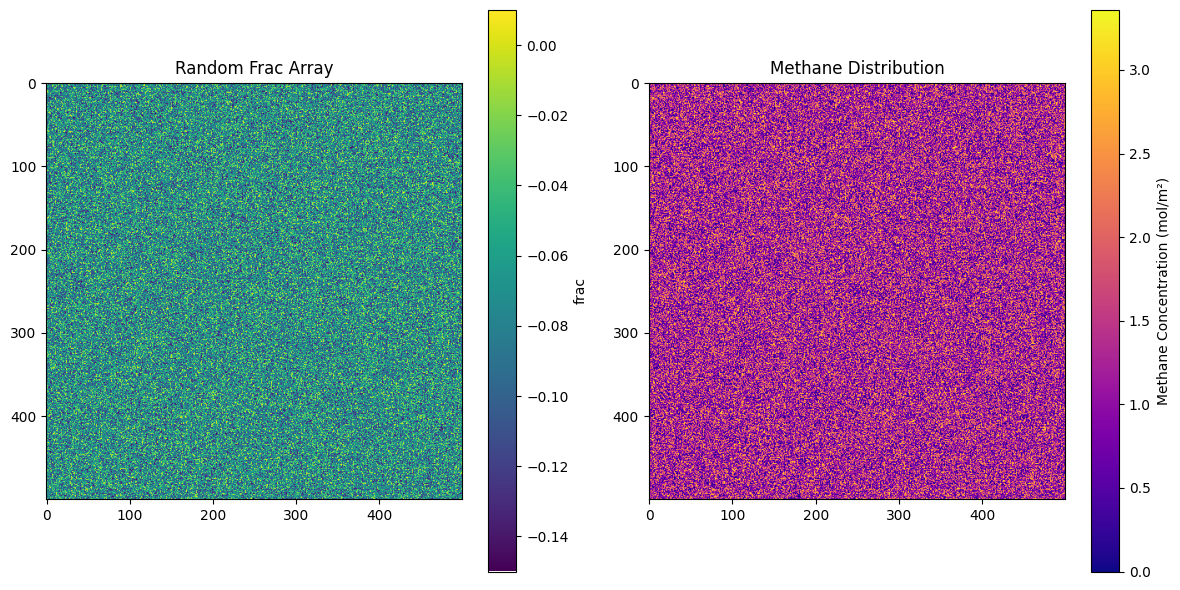

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

im1 = axs[0].imshow(array_500x500, cmap="viridis")
axs[0].set_title("Random Frac Array")
cbar1 = fig.colorbar(im1, ax=axs[0], orientation="vertical")
cbar1.set_label("frac")

im2 = axs[1].imshow(methane_500x500, cmap="plasma")
axs[1].set_title("Methane Distribution")
cbar = fig.colorbar(im2, ax=axs[1], orientation="vertical")
cbar.set_label("Methane Concentration (mol/m²)")

plt.tight_layout()
plt.show()

# Landsat8

In [11]:
import matplotlib.pyplot as plt
import numpy as np

import radtran
from radtran import get_gamma, radtran
from radtran.filter_functions import generate_global_filter
from radtran.lib import retrieve_methane

In [12]:
aux_data_path = "../data/aux_data"
hapi_data_path = "../data/hapi_data"
solarangle = 0
obsangle = 0
instrument = "Landsat8"
temperature = 300
pressure = 1.013

In [14]:
gamma = get_gamma(solarangle, obsangle)

b6_global_filter = generate_global_filter(temperature, pressure, instrument, hapi_data_path, aux_data_path, "B6", gamma)
b7_global_filter = generate_global_filter(temperature, pressure, instrument, hapi_data_path, aux_data_path, "B7", gamma)
b9_global_filter = generate_global_filter(temperature, pressure, instrument, hapi_data_path, aux_data_path, "B9", gamma)

In [18]:
ch4s, nB6 = radtran(
    pressure, temperature, solarangle, obsangle, b6_global_filter, instrument, "B6", hapi_data_path, 0, 50
)
ch4s, nB7 = radtran(
    pressure, temperature, solarangle, obsangle, b7_global_filter, instrument, "B7", hapi_data_path, 0, 50
)
ch4s, nB9 = radtran(
    pressure, temperature, solarangle, obsangle, b9_global_filter, instrument, "B9", hapi_data_path, 0, 50
)


# Here I am defining randomly the frac table as the ratio of B7 and B6
frac_table = nB7 / nB6 - 1
ch4_table = ch4s

array_500x500 = np.random.uniform(low=-0.15, high=0.01, size=(500, 500))
methane_500x500 = retrieve_methane(array_500x500, frac_table, ch4_table)

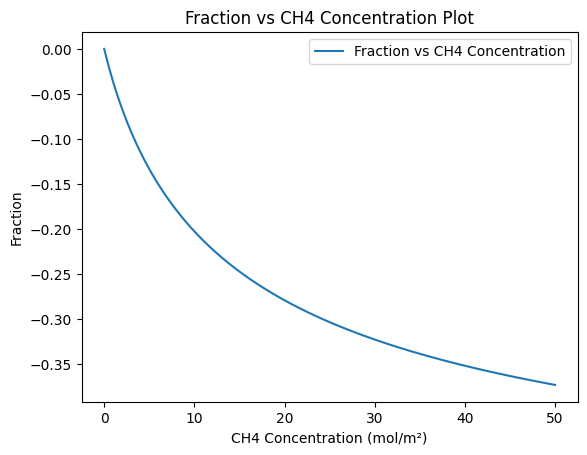

In [19]:
plt.plot(ch4_table, frac_table, label="Fraction vs CH4 Concentration")
plt.xlabel("CH4 Concentration (mol/m²)")
plt.ylabel("Fraction")
plt.title("Fraction vs CH4 Concentration Plot")
plt.legend()
plt.show()

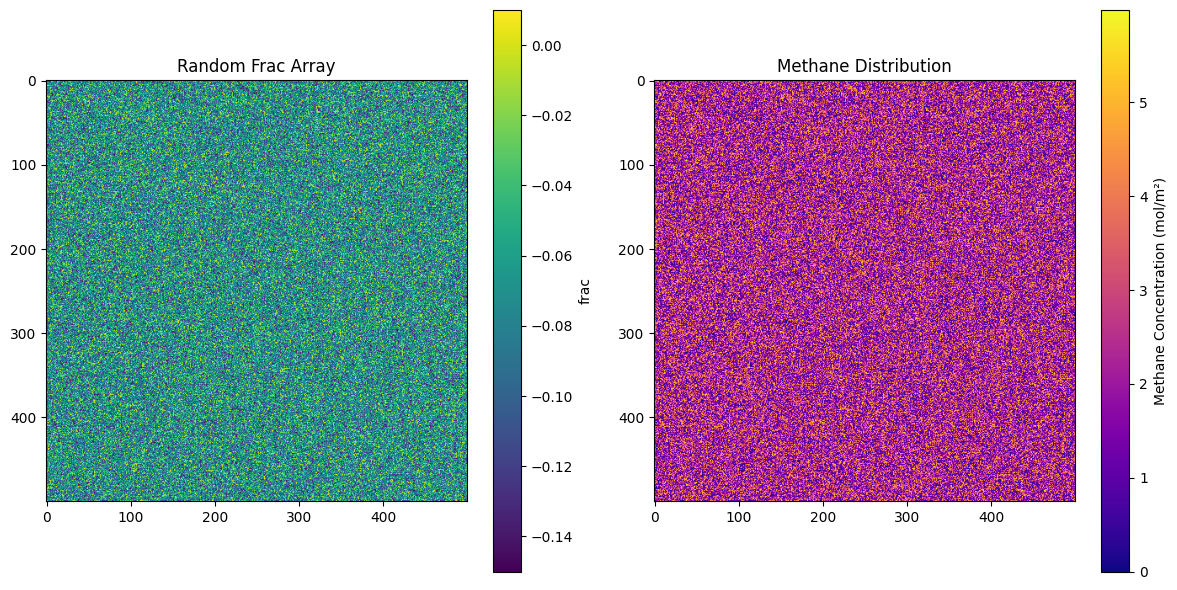

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

im1 = axs[0].imshow(array_500x500, cmap="viridis")
axs[0].set_title("Random Frac Array")
cbar1 = fig.colorbar(im1, ax=axs[0], orientation="vertical")
cbar1.set_label("frac")

im2 = axs[1].imshow(methane_500x500, cmap="plasma")
axs[1].set_title("Methane Distribution")
cbar = fig.colorbar(im2, ax=axs[1], orientation="vertical")
cbar.set_label("Methane Concentration (mol/m²)")

plt.tight_layout()
plt.show()